# Calcul du débit sur la base du traitement phonétique du TRS
=> ATTENTION LA TIMELINE EST DIFFERENTE DE CELLE DE LA VIDEO
- Première mi-temps TRS "0.000" => Vidéo "00:11:52.4"
- Deuxième mi-temps TRS "3257.608" => Vidéo "00:57:22.70"

In [1]:
import pandas as pd
from numpy import arange
import codecs

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import pickle

In [184]:
repertoire="/Users/gilles/Copy/Recherche/Rugby/CorpusRugby2007/"
textgridName="/Users/gilles/Copy/Recherche/Rugby/CorpusRugby2007/phonTimelineSorted.csv"
exportName="/Users/gilles/Copy/Recherche/Rugby/CorpusRugby2007/Timeline-Pauses.pkl"
textgridFile=open(textgridName,"r")
textgrid=textgridFile.readlines()

In [69]:
timing=[]
for ligne in textgrid[1:]:
    timing.append(ligne.strip().split(","))

In [70]:
timeLine=pd.DataFrame(columns=["début","fin","pause","suivant"])

In [78]:
for num,ligne1 in enumerate(timing):
    debut=int(float(ligne1[0])*100)
    speaker=ligne1[3]
    if num+2<longueur:
        ligne2=timing[num+1]
        ligne3=timing[num+2]
        if ligne1[2]=="SIL" and ligne1[1]==ligne2[0]:
            if ligne2[2]!="":
                timeLine.loc[debut]=[ligne1[0],ligne1[1],speaker,ligne2[3]]
            else:
                timeLine.loc[debut]=[ligne1[0],ligne3[0],speaker,ligne3[3]]


In [82]:
timeLine[(timeLine["pause"]=="spk1")&(timeLine["suivant"]=="spk2")]

,début,fin,pause,suivant,durée
3934,39.34,40.55,spk1,spk2,1.21
17062,170.62,171.52,spk1,spk2,0.90
17242,172.42,172.75,spk1,spk2,0.33
25240,252.4,252.7,spk1,spk2,0.30
26714,267.15,267.29,spk1,spk2,0.14
28633,286.34,287.33,spk1,spk2,0.99
33487,334.87,335.93,spk1,spk2,1.06
38475,384.75,385.04,spk1,spk2,0.29
52941,529.41,529.52,spk1,spk2,0.11
60524,605.24,606.57,spk1,spk2,1.33


In [185]:
#print len(timeLine[timeLine.index<4400][timeLine[timeLine.index<4400].index>3300][["V1","V2","V3"]].dropna(thresh=1))
timeLine["durée"]=timeLine["fin"].astype(float)-timeLine["début"].astype(float)

In [136]:
def arrondirTemps(temps,ecart):
    result=round(temps*ecart)/ecart
    return result

In [186]:
def arrondirTemps(temps):
    result=round(temps,2)
    return result

In [187]:
arrondirTemps(.5834)

0.58

In [188]:
timeLine["plage"]=timeLine.apply(lambda row: arrondirTemps(row["durée"]),axis=1)

In [189]:
timeLine["même"]=timeLine["pause"]==timeLine["suivant"]

In [190]:
with codecs.open(exportName.replace(".csv",".pkl"),"wb") as output:
    pickle.dump(timeLine, output, pickle.HIGHEST_PROTOCOL)

In [179]:
timeLine[(timeLine["durée"]<100)].count()
#timeLine

début      5964
fin        5964
pause      5964
suivant    5964
durée      5964
plage      5964
même       5964
dtype: int64

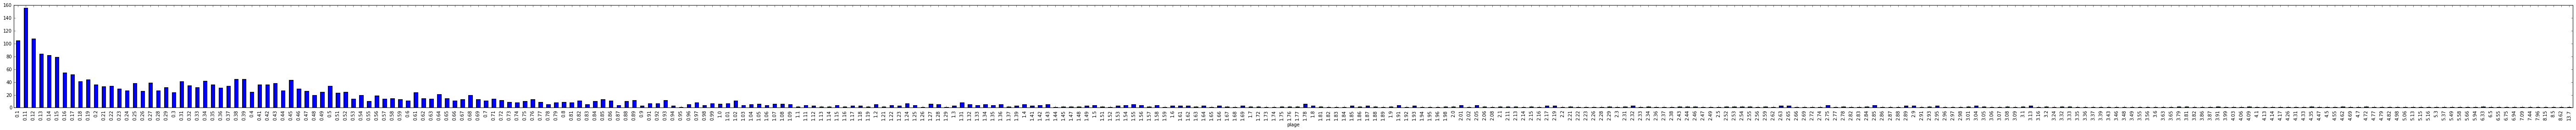

In [191]:
timeLine[(timeLine["même"])&(timeLine["durée"]<100)&(timeLine["durée"]>.1)].groupby("plage")["pause"].count().plot(kind="bar",figsize=(100,4))

In [192]:
timeLine[(timeLine["durée"]<.5)&(timeLine["durée"]>.3)]

,début,fin,pause,suivant,durée,plage,même
3668,36.68,37.14,spk1,spk1,0.46,0.46,True
6387,63.87,64.19,spk1,spk1,0.32,0.32,True
6567,65.67,66.05,spk1,spk1,0.38,0.38,True
8180,81.8,82.14,spk1,spk1,0.34,0.34,True
8901,89.01,89.39,spk1,spk1,0.38,0.38,True
9276,92.76,93.25,spk1,spk1,0.49,0.49,True
9440,94.4,94.74,spk1,spk1,0.34,0.34,True
10052,100.52,100.95,spk3,spk2,0.43,0.43,False
10323,103.23,103.58,spk2,spk2,0.35,0.35,True
10665,106.65,107.0,spk2,spk2,0.35,0.35,True
